## Figure 5: Methods for var per site dist

In [1]:
import toytree
import toyplot, toyplot.svg
import numpy as np
import pandas as pd
import itertools
import ipcoal

In [2]:
toytree.__version__

'3.0.dev8'

### Draw trees

In [3]:
# get an ultrametric imbalanced tree
IMBTREE = toytree.rtree.imbtree(8, treeheight=1e6)
EDGES = [3, 4, 10, 11]
# EDGES = [0, 1, 2, 6, 7, 8, 9, 13, 14]
NE_DEFAULT = 5e5
GT_DEFAULT = 1
RNG = np.random.default_rng(123)
NLOCI = 10_000
NAME_ORDER = sorted(IMBTREE.get_tip_labels())[::-1]
NAME_ORDER     # use when tree.draw(fixed_order=NAME_ORDER)

['r7', 'r6', 'r5', 'r4', 'r3', 'r2', 'r1', 'r0']

In [4]:
# set parameters on the species tree
imbtree_ne = IMBTREE.copy()
imbtree_ne = imbtree_ne.set_node_data("Ne", {i: NE_DEFAULT * 20 for i in EDGES}, default=NE_DEFAULT)
imbtree_ne = imbtree_ne.set_node_data("gt", default=GT_DEFAULT)
imbtree_ne = imbtree_ne.set_node_data("tg", {i: i.dist / i.gt for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("tc", {i: i.tg / (2 * i.Ne) for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("theta", {i: 4 * i.Ne * 1e-8 for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("rho", {i: 4 * i.Ne * 1e-9 for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("tg_rho", {i: i.tg * i.rho for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("tg_theta", {i: i.tg * i.theta * 1e-9 for i in imbtree_ne})

# convert edge lens to units of generations.
imbtree_ne = imbtree_ne.set_node_data("dist", {i: i.tg for i in imbtree_ne})

# show data
imbtree_ne.get_node_data()

,idx,name,height,dist,support,Ne,gt,rho,tc,tg,tg_rho,tg_theta,theta
0,0,r0,1.164153e-10,1.428571e+05,NaN,500000.0,1,0.002,0.142857,1.428571e+05,285.714286,0.000003,0.02
1,1,r1,1.164153e-10,1.428571e+05,NaN,500000.0,1,0.002,0.142857,1.428571e+05,285.714286,0.000003,0.02
2,2,r2,1.164153e-10,2.857143e+05,NaN,500000.0,1,0.002,0.285714,2.857143e+05,571.428571,0.000006,0.02
3,3,r3,0.000000e+00,4.285714e+05,NaN,10000000.0,1,0.040,0.021429,4.285714e+05,17142.857143,0.000171,0.40
4,4,r4,0.000000e+00,5.714286e+05,NaN,10000000.0,1,0.040,0.028571,5.714286e+05,22857.142857,0.000229,0.40
5,5,r5,1.164153e-10,7.142857e+05,NaN,500000.0,1,0.002,0.714286,7.142857e+05,1428.571429,0.000014,0.02
6,6,r6,0.000000e+00,8.571429e+05,NaN,500000.0,1,0.002,0.857143,8.571429e+05,1714.285714,0.000017,0.02
7,7,r7,0.000000e+00,1.000000e+06,NaN,500000.0,1,0.002,1.000000,1.000000e+06,2000.000000,0.000020,0.02
8,8,,1.428571e+05,1.428571e+05,NaN,500000.0,1,0.002,0.142857,1.428571e+05,285.714286,0.000003,0.02
9,9,,2.857143e+05,1.428571e+05,NaN,500000.0,1,0.002,0.142857,1.428571e+05,285.714286,0.000003,0.02


In [5]:
model = ipcoal.Model(tree=imbtree_ne, seed_trees=123, seed_mutations=123)
model.sim_loci(1, 10000)

In [6]:
model.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,45,45,1,0,(r7:2304386.946369495708...
1,0,45,59,14,2,1,(r7:2304386.946369495708...
2,0,59,190,131,18,2,(r7:2304386.946369495708...
3,0,190,204,14,0,3,(r7:2304386.946369495708...
4,0,204,626,422,42,4,(r7:2304386.946369495708...
...,...,...,...,...,...,...,...
78,0,9470,9476,6,0,78,((r4:906619.798991306568...
79,0,9476,9543,67,7,79,((r4:906619.798991306568...
80,0,9543,9587,44,3,80,((r7:1094463.09560313005...
81,0,9587,9661,74,5,81,((r7:1094463.09560313005...


In [38]:
mtree = toytree.mtree(model.df.genealogy)

In [62]:
mtree.get_unique_topologies()

[[<toytree.ToyTree at 0x7f56dabdb110>, 7],
 [<toytree.ToyTree at 0x7f56dabc8ed0>, 4],
 [<toytree.ToyTree at 0x7f56dac83c50>, 4],
 [<toytree.ToyTree at 0x7f56dab85390>, 3],
 [<toytree.ToyTree at 0x7f56df962610>, 3],
 [<toytree.ToyTree at 0x7f56dab9fad0>, 3],
 [<toytree.ToyTree at 0x7f56daba6150>, 3],
 [<toytree.ToyTree at 0x7f56da9f2890>, 3],
 [<toytree.ToyTree at 0x7f56daa0a610>, 3],
 [<toytree.ToyTree at 0x7f56dab7ea90>, 2],
 [<toytree.ToyTree at 0x7f56dac2cc10>, 2],
 [<toytree.ToyTree at 0x7f56dac9c3d0>, 2],
 [<toytree.ToyTree at 0x7f56dab99d10>, 2],
 [<toytree.ToyTree at 0x7f56dabaaa50>, 2],
 [<toytree.ToyTree at 0x7f56dabab1d0>, 2],
 [<toytree.ToyTree at 0x7f56dabb7b50>, 2],
 [<toytree.ToyTree at 0x7f56dabc3cd0>, 2],
 [<toytree.ToyTree at 0x7f56dabd3f90>, 2],
 [<toytree.ToyTree at 0x7f56da9ffa50>, 2],
 [<toytree.ToyTree at 0x7f56daa09ed0>, 2],
 [<toytree.ToyTree at 0x7f56daa0fb10>, 2],
 [<toytree.ToyTree at 0x7f56daa16050>, 2],
 [<toytree.ToyTree at 0x7f56dac231d0>, 1],
 [<toytree.

In [11]:
# first few genealogies
model.df.head()

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,45,45,1,0,(r7:2304386.946369495708...
1,0,45,59,14,2,1,(r7:2304386.946369495708...
2,0,59,190,131,18,2,(r7:2304386.946369495708...
3,0,190,204,14,0,3,(r7:2304386.946369495708...
4,0,204,626,422,42,4,(r7:2304386.946369495708...


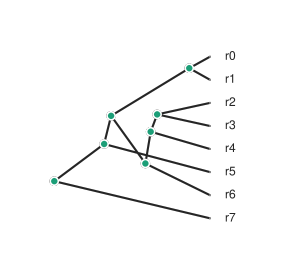

In [73]:
c, a, m = mtree[0].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree0.svg")
c

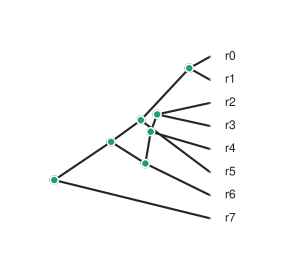

In [72]:
c, a, m = mtree[1].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree1.svg")
c

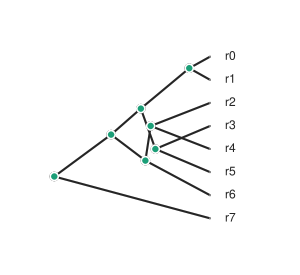

In [71]:
c, a, m = mtree[2].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree2.svg")
c

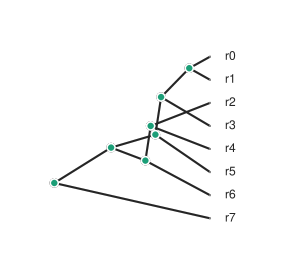

In [74]:
c, a, m = mtree[3].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree3.svg")
c

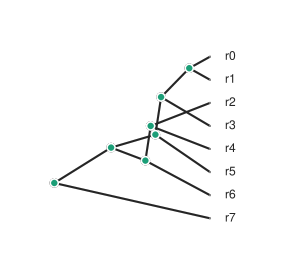

In [75]:
c, a, m = mtree[3].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree3.svg")
c

In [26]:
model.df.iloc[35, :]

locus                                  0
start                               4941
end                                 5100
nbps                                 159
nsnps                                 17
tidx                                  35
genealogy    (((r7:1110316.2272378159...
Name: 35, dtype: object

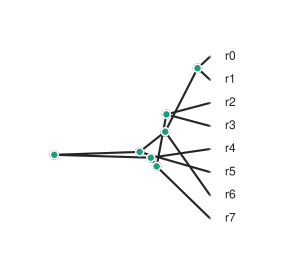

In [76]:
c, a, m = mtree[35].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree35.svg")
c

In [99]:
model.df.iloc[36, :]

locus                                  0
start                               5100
end                                 5164
nbps                                  64
nsnps                                  8
tidx                                  36
genealogy    ((r4:1232359.49607226764...
Name: 36, dtype: object

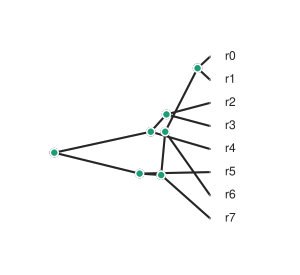

In [77]:
c, a, m = mtree[36].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree36.svg")
c

In [12]:
# last few genealogies
model.df.tail()

,locus,start,end,nbps,nsnps,tidx,genealogy
78,0,9470,9476,6,0,78,((r4:906619.798991306568...
79,0,9476,9543,67,7,79,((r4:906619.798991306568...
80,0,9543,9587,44,3,80,((r7:1094463.09560313005...
81,0,9587,9661,74,5,81,((r7:1094463.09560313005...
82,0,9661,10000,339,27,82,(r6:2059736.119645000202...


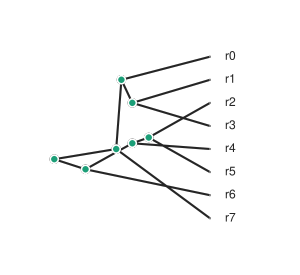

In [78]:
c, a, m = mtree[81].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree81.svg")
c

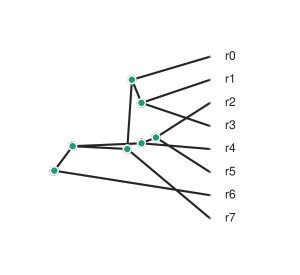

In [79]:
c, a, m = mtree[82].draw(ts='o', fixed_order = NAME_ORDER);
toyplot.svg.render(c, "./nb11_output/tree82.svg")
c

### Tip distance matrix

In [80]:
def plot_matrix(
    dat: np.ndarray,
    domain_min: float = None,
    domain_max: float = None,
    cmap: str = "BlueRed",
    gap: float = 0,
    mask_diagonal: bool = False,
    color_bar: bool = False,
) -> "Canvas":
    """Return a matrix heatmap """
    
    # get min and max of the off-diagonal elements
    if mask_diagonal:
        dat = dat.copy()
        dat[np.diag_indices_from(dat)] = np.nanmean(dat)
        
    dmin = dat.min() if domain_min is None else domain_min
    dmax = dat.max() if domain_max is None else domain_max
    cmap = toyplot.color.brewer.map(cmap, domain_min=dmin, domain_max=dmax)
    
    # add 20 pixels to the right if legend
    if color_bar:
        color_bar = 20
    else:
        color_bar = 0
    
    # draw the matrix table
    canvas = toyplot.Canvas(300 + color_bar, 300)
    ax1 = canvas.table(
        rows=dat.shape[0], 
        columns=dat.shape[1],
        bounds=(50, 250, 50, 250),
    )
    
    # apply colors to cells but not diagonals
    for ridx in range(dat.shape[0]):
        for cidx in range(dat.shape[1]):
            col = cmap.color(dat[ridx, cidx])
            ax1.cells.cell[ridx, cidx].style = {'fill': col, 'stroke': 'none'}
            
            # overwrite if masking
            if (ridx == cidx) and mask_diagonal:
                ax1.cells.cell[ridx, cidx].style = {'fill': 'black', 'stroke': 'none'}
            
    # style spacing between grid cells            
    ax1.body.gaps.columns[...] = gap
    ax1.body.gaps.rows[...] = gap
    
    ax2 = canvas.cartesian(bounds=(50, 250, 50, 250), margin=0, padding=0)
    ax2.x.ticks.labels.show = False
    ax2.x.spine.style["stroke"] = "black"
    ax2.x.spine.style["stroke-width"] = 2
    ax2.y.ticks.labels.show = False
    ax2.y.spine.style["stroke"] = "black"
    ax2.y.spine.style["stroke-width"] = 2
    ax3 = ax2.share('x')
    ax3.y.ticks.labels.show = False
    ax3.y.spine.style["stroke"] = "black"
    ax3.y.spine.style["stroke-width"] = 2
    ax4 = ax2.share('y')
    ax4.x.ticks.labels.show = False
    ax4.x.spine.style["stroke"] = "black"
    ax4.x.spine.style["stroke-width"] = 2
    
    # add a colorbar to canvas
    if color_bar:
        numberline = canvas.numberline(270, 250, 270, 50)
        numberline.colormap(cmap, width=15, style={"stroke-width": 2, "stroke": "black"})
        numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[domain_min, domain_min/2, domain_max],
                                                                labels=[domain_min, domain_min/2, domain_max])
        #numberline.axis.ticks.locator = toyplot.locator.Extended(only_inside=True)
        numberline.axis.ticks.show = True
        numberline.axis.ticks.near = False
        numberline.axis.ticks.style["stroke-width"] = 2
        numberline.axis.spine.style["stroke-width"] = 2
        numberline.axis.ticks.labels.style["font-size"] = 14
    return canvas

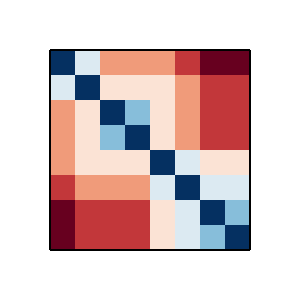

In [91]:
dist_matrix = toytree.distance.get_tip_distance_matrix(mtree[0], topology_only=True, df=True)
c = plot_matrix(dist_matrix.values)
toyplot.svg.render(c, "./nb11_output/tree0_dist_matrix.svg")
c

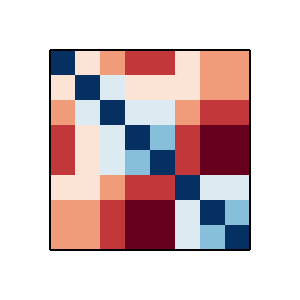

In [92]:
dist_matrix = toytree.distance.get_tip_distance_matrix(mtree[1], topology_only=True, df=True)
c = plot_matrix(dist_matrix.values)
toyplot.svg.render(c, "./nb11_output/tree1_dist_matrix.svg")
c

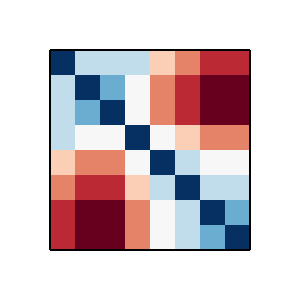

In [97]:
dist_matrix = toytree.distance.get_tip_distance_matrix(mtree[35], topology_only=True, df=True)
c = plot_matrix(dist_matrix.values)
toyplot.svg.render(c, "./nb11_output/tree35_dist_matrix.svg")
c

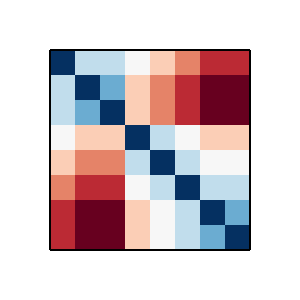

In [98]:
dist_matrix = toytree.distance.get_tip_distance_matrix(mtree[36], topology_only=True, df=True)
c = plot_matrix(dist_matrix.values)
toyplot.svg.render(c, "./nb11_output/tree36_dist_matrix.svg")
c

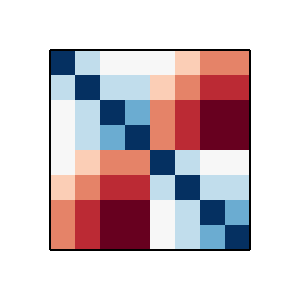

In [96]:
dist_matrix = toytree.distance.get_tip_distance_matrix(mtree[81], topology_only=True, df=True)
c = plot_matrix(dist_matrix.values)
toyplot.svg.render(c, "./nb11_output/tree81_dist_matrix.svg")
c

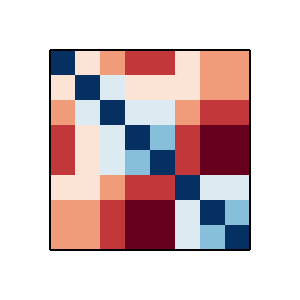

In [95]:
dist_matrix = toytree.distance.get_tip_distance_matrix(mtree[82], topology_only=True, df=True)
c = plot_matrix(dist_matrix.values)
toyplot.svg.render(c, "./nb11_output/tree82_dist_matrix.svg")
c